In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Préliminaires

In [12]:
def f_1(X, alpha):
    return alpha * np.sum(X**2)

def f_2(X, alpha):
    n = len(X)
    s = 0
    for i in range(1, n+1):
        s += (10**(alpha*(i-1)/(n-1))*X[i-1])**2
    return s/2

def f_3(X, alpha):
    n = len(X)
    s = 10*n
    i = 0
    for x in X:
        i += 1
        s += (10**(alpha*(i-1)/(n-1))* (x-1)**2) - 10*np.cos(2*np.pi*(x-1))
    return s

def f_4(X, alpha):
    n = len(X)
    s = 0
    for i in range(0,n-1):
        s += 10**alpha * ((X[i]-1)**2 - (X[i+1]-1))**2 + (X[i] - 2)**2    
    return s

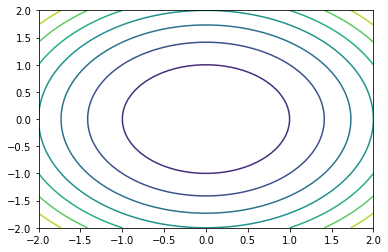

In [3]:
alpha = .5

x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = []
for i in range(len(X)):
    l = []
    for j in range(len(Y)):
        l.append(f_1(np.array([X[i,j], Y[i,j]]), alpha))
    Z.append(l)
plt.contour(X, Y, Z)

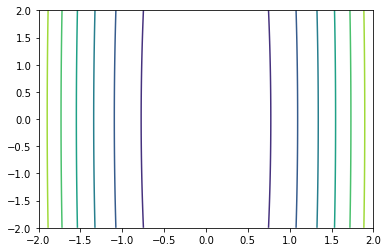

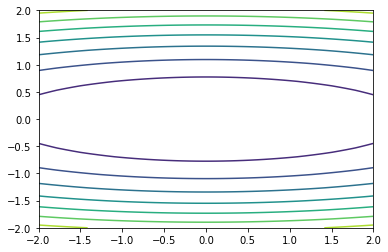

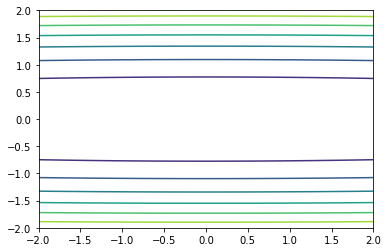

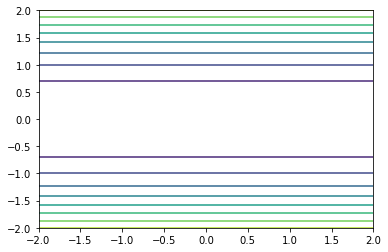

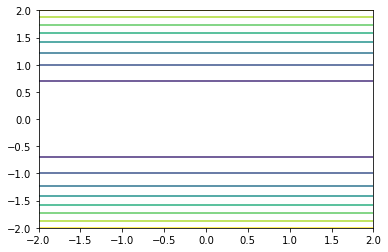

In [4]:
alpha = [-2, -1, .5, 1, 3, 6]

x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

#ax.set_title('A single plot')

#fig, axs = plt.subplots(2, 2)

for a in alpha:
    Z = []
    for i in range(len(X)):
        l = []
        for j in range(len(Y)):
            l.append(f_2(np.array([X[i,j], Y[i,j]]), a))
        Z.append(l)
    plt.contour(X, Y, Z)
    plt.show()

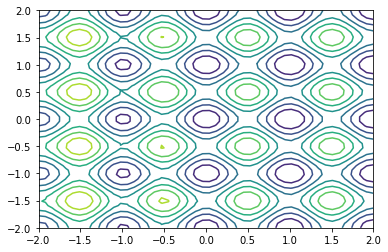

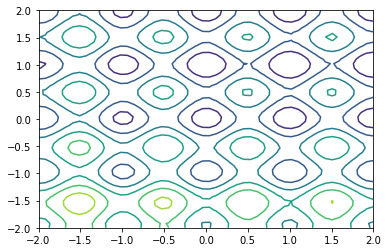

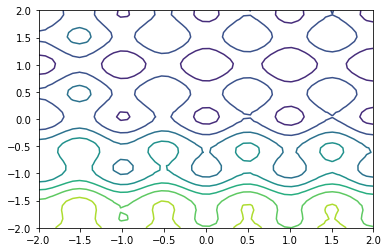

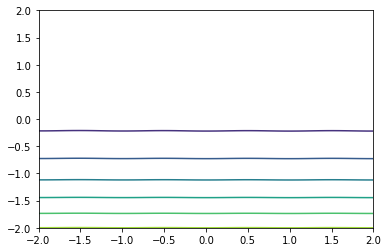

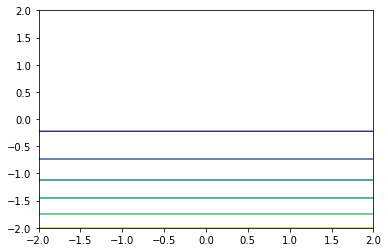

In [5]:
alpha = [-1, .5, 1, 3, 6]

x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

for a in alpha:
    Z = []
    for i in range(len(X)):
        l = []
        for j in range(len(Y)):
            l.append(f_3(np.array([X[i,j], Y[i,j]]), a))
        Z.append(l)
    plt.contour(X, Y, Z)
    plt.show()

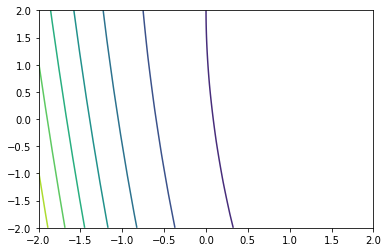

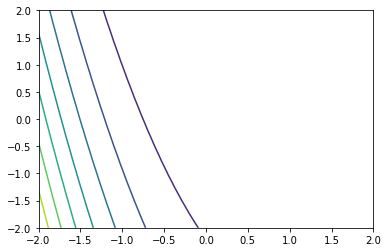

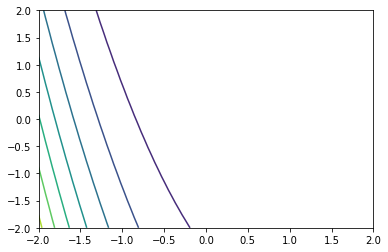

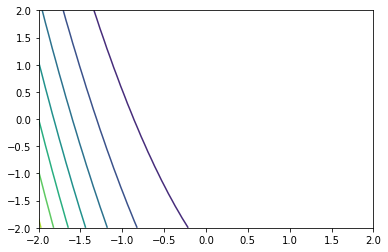

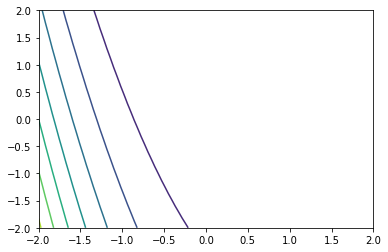

In [6]:
alpha = [-1, .5, 1, 3, 6]

x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

for a in alpha:
    Z = []
    for i in range(len(X)):
        l = []
        for j in range(len(Y)):
            l.append(f_4(np.array([X[i,j], Y[i,j]]), a))
        Z.append(l)
    plt.contour(X, Y, Z)
    plt.show()

# 2. Gradient Descent

In [1]:
def f_1_prime(X, alpha):
    return 2 * alpha * X

In [8]:
print(f_1_prime(np.array([1,1,1,1,1]), .5))

5.0


TypeError: Input z must be 2D, not 3D

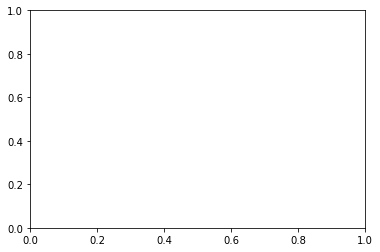

In [4]:
alpha = [-1, .5, 1, 3, 6]

x = np.linspace(-2, 2, 50) 
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)

for a in alpha:
    Z = []
    for i in range(len(X)):
        l = []
        for j in range(len(Y)):
            l.append(f_1_prime(np.array([X[i,j], Y[i,j]]), a))
        Z.append(l)
    plt.contour(X, Y, Z)
    plt.show()

## 2.1 Fixed step size

In [5]:
def gd_fixed_sz(X_0, f, f_prime, alpha, sz):
    X = X_0
    tmp_X = X_0
    
    ys = []
    xs = []
    
    for i in range(10**4):
        d = f_prime(X, alpha)
                
        tmp_X = tmp_X - sz*d
        
        y1 = f(X, alpha)
        y2 = f(tmp_X, alpha)
        
        if y2 < y1:
            ys += [y2]
            X = tmp_X
        else:
            ys += [y1]
            
        xs += [X]
    
        if np.abs(d) < 1e-12:
            print('i: ', i, ', d:', np.abs(d), ' break !')
            break
        
    return xs, ys

In [116]:
alpha = [.5, 1/20, 1/200]
step_sizes = [0.1, 0.01]
X = [
    [10,10],
    [10]*10
]

for a in alpha:
    for sz in step_sizes:
        for x in X:
            xs, ys = gd_fixed_sz(np.array(x), f_1, f_1_prime , a, sz)

            print('alpha: ', a, ', step_size: ', sz)
            print("first 5 xs :")
            print(xs[:5])
            print("first 5 yss :")
            print(ys[:5])

            print("last 5 xs :")
            print(xs[-5:])
            print("last 5 ys :")
            print(ys[-5:])

            plt.plot(np.sum(xs, axis=1),ys)
            plt.show()

            plt.plot(np.arange(len(ys)),ys)
            plt.show()

            plt.semilogy(np.arange(len(ys)),ys)
            plt.show()


NameError: name 'gd_fixed_sz' is not defined

## 2.2 Step-size Adapatif
### Armijo Rule

In [112]:
def armijo_v2(d, x, f, grad ,alpha):
    sigma = 10
    theta, beta = .5, .5
    while f(x+sigma*d, alpha) > f(x, alpha) + sigma*theta*np.array(grad(x, alpha)).T@d:
        sigma = beta*sigma
    return sigma

def armijo(d, x, f, f_prime, alpha):
    sig = 10
    theta, beta = .5, .5
    
    #for i in range(500):
    i = 0
    while True:
        x1 = x + sig*d
        y1 = f(x1, alpha)        
        y2 = f(x, alpha) + theta * sig * np.array(f_prime(x, alpha)).T @ d
        
        if y1 > y2:
            sig = sig*beta
        else:
            #print('i: ', i, ', sig: ', sig, ', armijo break !')
            break
        i += 1
    return sig

In [113]:
def gd_adaptatif_sz(X_0, f, f_prime, alpha):
    X = X_0
    tmp_X = X_0
    
    ys = []
    xs = []
    
    for i in range(10**4):
        d = np.array(f_prime(X, alpha))

        sz = armijo(-d, X, f, f_prime, alpha)
        
        tmp_X = tmp_X - sz*d
        
        y1 = f(X, alpha)
        y2 = f(tmp_X, alpha)
        
        if y2 < y1:
            ys += [y2]
            X = tmp_X
        else:
            ys += [y1]
            
        xs += [X]
    
        if np.linalg.norm(d) < 1e-12:
            print('i: ', i, ', d:', np.abs(d), ' break !')
            break
        
    return xs, ys


def algo2(x0, f, grad, alpha, n_iter=10**4):
    X = x0
    Xs = [X]
    fXs =[f(X, alpha)]
    xt = x0
    t=0
    while (t < n_iter) and (np.linalg.norm(grad(xt, alpha)) >= 10**(-12)):
        if t % 1000 == 0:
            print(t, grad(xt, alpha))
            
        dt = - np.array(grad(xt, alpha))
        
        
        sigmat =  armijo_v2(dt, xt, f, grad, alpha)
        
        xt = xt + sigmat*dt
        if f(xt, alpha) < f(X, alpha):
            X = xt
        t+=1
        Xs = np.vstack((Xs, X))
        fXs = np.vstack((fXs, f(X, alpha)))
    return X, Xs, fXs

alpha:  0.5 x_i:  [10, 10]
i:  31 , d: [6.23690745e-13 6.23690745e-13]  break !
first 5 xs :
[array([3.75, 3.75]), array([1.40625, 1.40625]), array([0.52734375, 0.52734375]), array([0.19775391, 0.19775391]), array([0.07415771, 0.07415771])]
first 5 yss :
[14.0625, 1.9775390625, 0.2780914306640625, 0.03910660743713379, 0.005499366670846939]
last 5 xs :
[array([1.18270245e-11, 1.18270245e-11]), array([4.43513419e-12, 4.43513419e-12]), array([1.66317532e-12, 1.66317532e-12]), array([6.23690745e-13, 6.23690745e-13]), array([2.33884029e-13, 2.33884029e-13])]
last 5 ys :
[1.3987850846658102e-22, 1.9670415253112954e-23, 2.7661521449690093e-24, 3.889901453862669e-25, 5.470173919494378e-26]


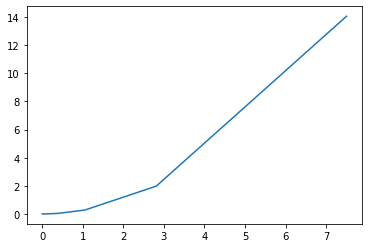

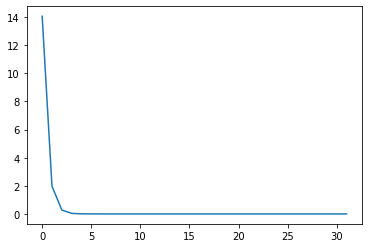

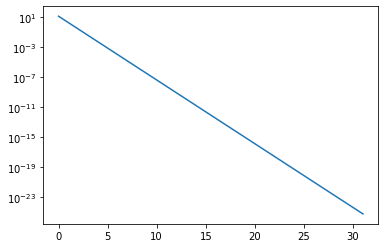

alpha:  0.5 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
i:  32 , d: [2.33884029e-13 2.33884029e-13 2.33884029e-13 2.33884029e-13
 2.33884029e-13 2.33884029e-13 2.33884029e-13 2.33884029e-13
 2.33884029e-13 2.33884029e-13]  break !
first 5 xs :
[array([3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75, 3.75]), array([1.40625, 1.40625, 1.40625, 1.40625, 1.40625, 1.40625, 1.40625,
       1.40625, 1.40625, 1.40625]), array([0.52734375, 0.52734375, 0.52734375, 0.52734375, 0.52734375,
       0.52734375, 0.52734375, 0.52734375, 0.52734375, 0.52734375]), array([0.19775391, 0.19775391, 0.19775391, 0.19775391, 0.19775391,
       0.19775391, 0.19775391, 0.19775391, 0.19775391, 0.19775391]), array([0.07415771, 0.07415771, 0.07415771, 0.07415771, 0.07415771,
       0.07415771, 0.07415771, 0.07415771, 0.07415771, 0.07415771])]
first 5 yss :
[70.3125, 9.8876953125, 1.3904571533203125, 0.19553303718566895, 0.027496833354234695]
last 5 xs :
[array([4.43513419e-12, 4.43513419e-12, 4.43513419e-12, 

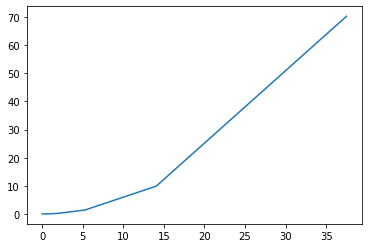

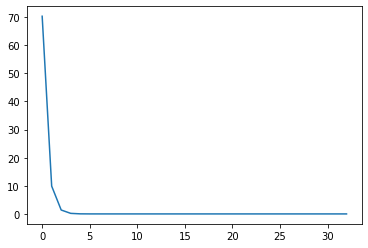

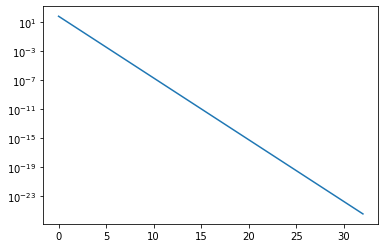

alpha:  0.05 x_i:  [10, 10]
i:  1 , d: [0. 0.]  break !
first 5 xs :
[array([0., 0.]), array([0., 0.])]
first 5 yss :
[0.0, 0.0]
last 5 xs :
[array([0., 0.]), array([0., 0.])]
last 5 ys :
[0.0, 0.0]


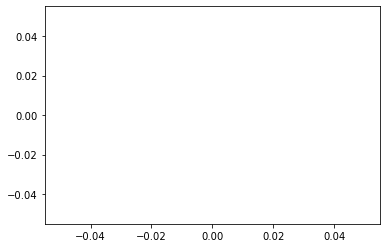

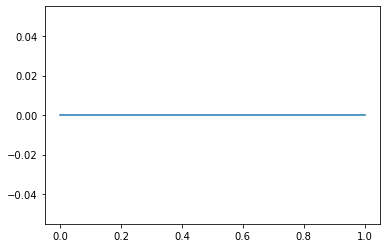

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


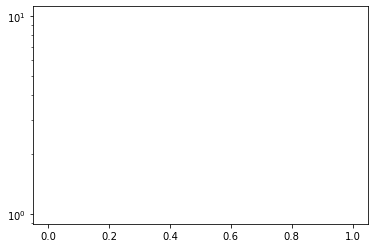

alpha:  0.05 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
i:  1 , d: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  break !
first 5 xs :
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
first 5 yss :
[0.0, 0.0]
last 5 xs :
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
last 5 ys :
[0.0, 0.0]


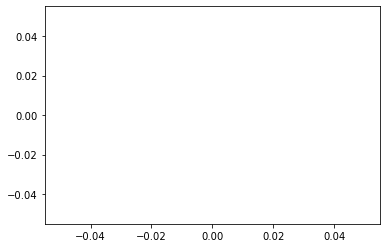

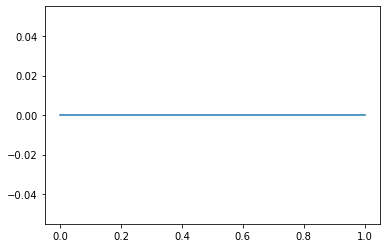

/home/alpha/anaconda3/envs/ML/lib/python3.9/site-packages/ipykernel/pylab/backend_inline.py:183: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


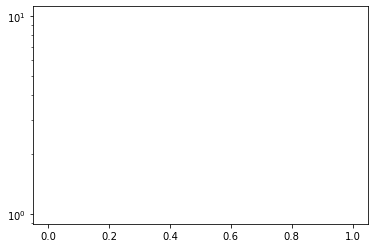

alpha:  0.005 x_i:  [10, 10]
i:  244 , d: [6.84183038e-13 6.84183038e-13]  break !
first 5 xs :
[array([9., 9.]), array([8.1, 8.1]), array([7.29, 7.29]), array([6.561, 6.561]), array([5.9049, 5.9049])]
first 5 yss :
[0.81, 0.6561, 0.5314409999999998, 0.43046720999999993, 0.34867844009999993]
last 5 xs :
[array([9.38522686e-11, 9.38522686e-11]), array([8.44670417e-11, 8.44670417e-11]), array([7.60203376e-11, 7.60203376e-11]), array([6.84183038e-11, 6.84183038e-11]), array([6.15764734e-11, 6.15764734e-11])]
last 5 ys :
[8.808248321898806e-23, 7.134681140738032e-23, 5.779091723997806e-23, 4.6810642964382234e-23, 3.791662080114961e-23]


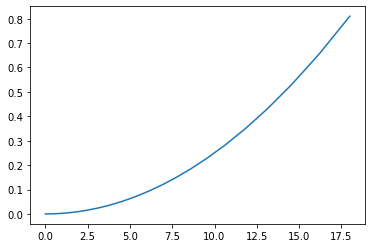

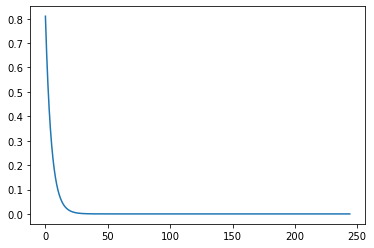

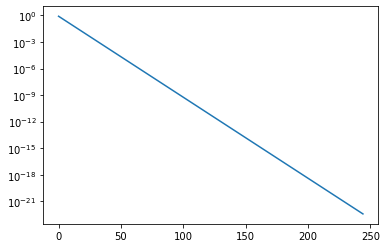

alpha:  0.005 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
i:  252 , d: [2.94518364e-13 2.94518364e-13 2.94518364e-13 2.94518364e-13
 2.94518364e-13 2.94518364e-13 2.94518364e-13 2.94518364e-13
 2.94518364e-13 2.94518364e-13]  break !
first 5 xs :
[array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]), array([8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1]), array([7.29, 7.29, 7.29, 7.29, 7.29, 7.29, 7.29, 7.29, 7.29, 7.29]), array([6.561, 6.561, 6.561, 6.561, 6.561, 6.561, 6.561, 6.561, 6.561,
       6.561]), array([5.9049, 5.9049, 5.9049, 5.9049, 5.9049, 5.9049, 5.9049, 5.9049,
       5.9049, 5.9049])]
first 5 yss :
[4.05, 3.2805, 2.657205, 2.1523360499999997, 1.7433922004999998]
last 5 xs :
[array([4.04003242e-11, 4.04003242e-11, 4.04003242e-11, 4.04003242e-11,
       4.04003242e-11, 4.04003242e-11, 4.04003242e-11, 4.04003242e-11,
       4.04003242e-11, 4.04003242e-11]), array([3.63602918e-11, 3.63602918e-11, 3.63602918e-11, 3.63602918e-11,
       3.63602918e-11, 3.63602918e-11, 3.636

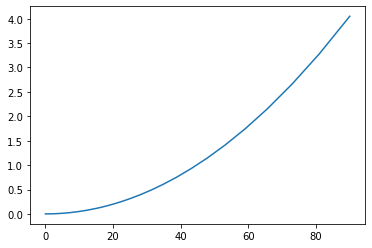

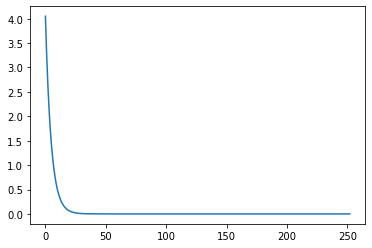

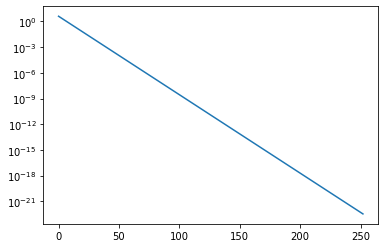

In [117]:
alpha = [.5, 1/20, 1/200]
X = [
    [10,10],
    [10]*10
]

for a in alpha:
    for x_i in X:
        print('alpha: ', a, 'x_i: ', x_i)

        #_, xs, ys = algo2(np.array(x_i), f_1, f_1_prime , a)
        xs, ys = gd_adaptatif_sz(np.array(x_i), f_1, f_1_prime , a)
        
        print("first 5 xs :")
        print(xs[:5])
        print("first 5 yss :")
        print(ys[:5])

        print("last 5 xs :")
        print(xs[-5:])
        print("last 5 ys :")
        print(ys[-5:])

        plt.plot(np.sum(xs, axis=1),ys)
        plt.show()

        plt.plot(np.arange(len(ys)),ys)
        plt.show()

        plt.semilogy(np.arange(len(ys)),ys)
        plt.show()


In [118]:
def f_2_prime(X, alpha):
    n = len(X)
    s = []
    for i in range(1, n+1):
        s += [(10**(alpha*(i-1)/(n-1))*X[i-1])]
    return s

alpha:  0.5 x_i:  [10, 10]
0 [10.0, 31.622776601683796]
first 5 xs :
[[10.         10.        ]
 [ 6.875       0.11788231]
 [ 2.578125   -0.11510306]
 [ 0.96679688  0.11238934]
 [ 0.36254883 -0.1097396 ]]
first 5 yss :
[[5.50000000e+02]
 [2.37022937e+01]
 [3.38960783e+00]
 [5.30504919e-01]
 [1.25934723e-01]]
last 5 xs :
[[ 1.62813574e-11 -1.74219400e-13]
 [ 6.10550904e-12  1.70111923e-13]
 [ 2.28956589e-12 -1.66101285e-13]
 [ 8.58587208e-13  1.62185204e-13]
 [ 3.21970203e-13 -1.58361451e-13]]
last 5 ys :
[[1.32693062e-22]
 [1.87833106e-23]
 [2.75900416e-24]
 [5.00106200e-25]
 [1.77224152e-25]]


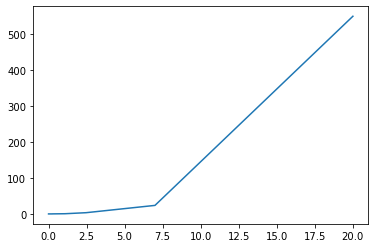

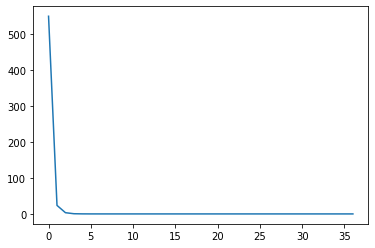

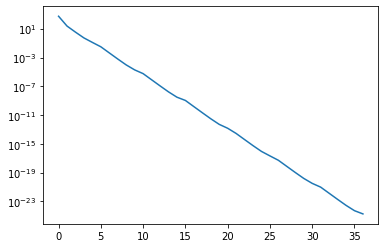

alpha:  0.5 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
0 [10.0, 11.364636663857247, 12.915496650148839, 14.677992676220695, 16.681005372000588, 18.95735652406376, 21.54434690031884, 24.484367468222274, 27.825594022071243, 31.622776601683796]
first 5 xs :
[[ 1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
   1.00000000e+01  1.00000000e+01  1.00000000e+01  1.00000000e+01
   1.00000000e+01  1.00000000e+01]
 [ 6.87500000e+00  6.44855104e+00  5.96390730e+00  5.41312729e+00
   4.78718582e+00  4.07582609e+00  3.26739159e+00  2.34863517e+00
   1.30450187e+00  1.17882312e-01]
 [ 2.57812500e+00  1.86821107e+00  1.14973075e+00  4.47262120e-01
  -2.03756204e-01 -7.53354429e-01 -1.13222203e+00 -1.24541774e+00
  -9.64156843e-01 -1.15103064e-01]
 [ 9.66796875e-01  5.41239818e-01  2.21646772e-01  3.69552374e-02
   8.67244184e-03  1.39246102e-01  3.92339481e-01  6.60411358e-01
   7.12607963e-01  1.12389341e-01]
 [ 3.62548828e-01  1.56802700e-01  4.27293882e-02  3.05344341e-03
  -3.69

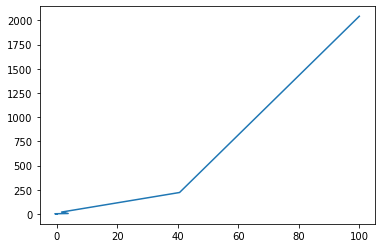

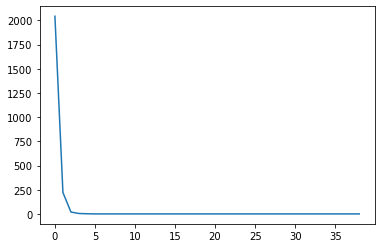

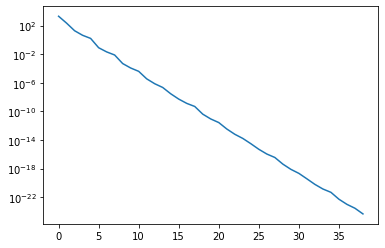

alpha:  0.05 x_i:  [10, 10]
0 [10.0, 11.220184543019634]
first 5 xs :
[[10.         10.        ]
 [ 3.75        2.98738466]
 [ 1.40625     0.89244671]
 [ 0.52734375  0.26660816]
 [ 0.19775391  0.07964611]]
first 5 yss :
[[1.12946271e+02]
 [1.26488692e+01]
 [1.49011211e+00]
 [1.83787869e-01]
 [2.35463025e-02]]
last 5 xs :
[[3.15387320e-11 6.80551445e-14]
 [1.18270245e-11 2.03306895e-14]
 [4.43513419e-12 6.07355899e-15]
 [1.66317532e-12 1.81440570e-15]
 [6.23690745e-13 5.42032774e-16]]
last 5 ys :
[[4.97348723e-22]
 [6.99395144e-23]
 [9.83523085e-24]
 [1.38307814e-24]
 [1.94495258e-25]]


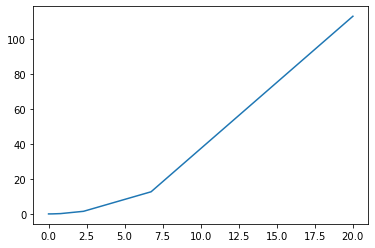

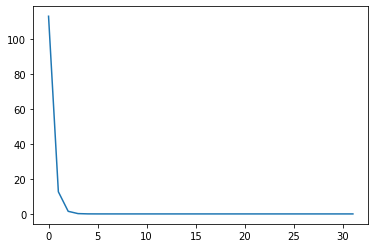

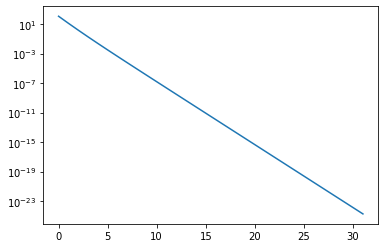

alpha:  0.05 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
0 [10.0, 10.12874308821193, 10.259143654700098, 10.391223038351692, 10.52500285277733, 10.660504989847922, 10.797751623277097, 10.936765212249707, 11.07756850509709, 11.220184543019634]
first 5 xs :
[[10.         10.         10.         10.         10.         10.
  10.         10.         10.         10.        ]
 [ 3.75        3.66953557  3.58803522  3.5054856   3.42187322  3.33718438
   3.25140524  3.16452174  3.07651968  2.98738466]
 [ 1.40625     1.34654913  1.28739967  1.22884293  1.17092163  1.11367996
   1.0571636   1.00141979  0.94649734  0.89244671]
 [ 0.52734375  0.49412099  0.46192354  0.43076912  0.40067454  0.37165554
   0.34372673  0.31690147  0.29119177  0.26660816]
 [ 0.19775391  0.18131946  0.16573979  0.15100549  0.13710575  0.12402831
   0.11175949  0.10028416  0.08958572  0.07964611]]
first 5 yss :
[[5.62525186e+02]
 [6.37384671e+01]
 [7.37277464e+00]
 [8.69870311e-01]
 [1.04550511e-01]]
last 5 xs :
[[3.15

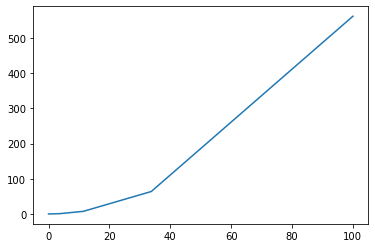

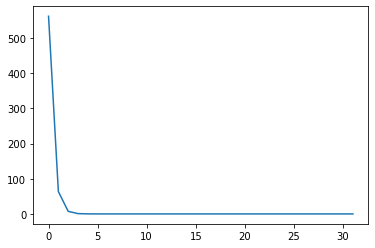

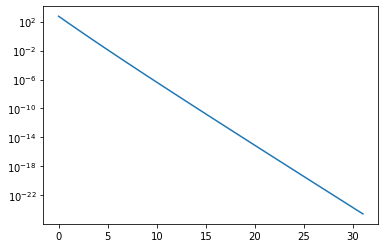

alpha:  0.005 x_i:  [10, 10]
0 [10.0, 10.115794542598985]
first 5 xs :
[[10.         10.        ]
 [ 3.75        3.67762841]
 [ 1.40625     1.35249507]
 [ 0.52734375  0.49739743]
 [ 0.19775391  0.18292429]]
first 5 yss :
[[1.01164650e+02]
 [1.39512437e+01]
 [1.92469526e+00]
 [2.65629209e-01]
 [3.66736589e-02]]
last 5 xs :
[[3.15387320e-11 1.86351047e-11]
 [1.18270245e-11 6.85329905e-12]
 [4.43513419e-12 2.52038873e-12]
 [1.66317532e-12 9.26905320e-13]
 [6.23690745e-13 3.40881334e-13]]
last 5 ys :
[[6.75023817e-22]
 [9.39701174e-23]
 [1.30853700e-23]
 [1.82265894e-24]
 [2.53948438e-25]]


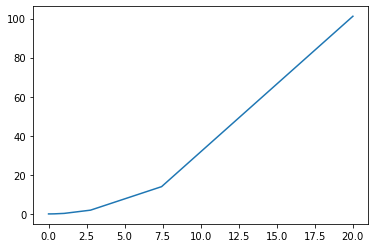

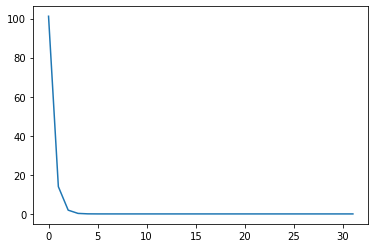

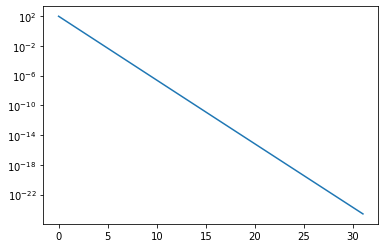

alpha:  0.005 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
0 [10.0, 10.012800324836986, 10.025617034505563, 10.03845014997885, 10.051299692256812, 10.064165682366289, 10.077048141361043, 10.089947090321779, 10.102862550356189, 10.115794542598985]
first 5 xs :
[[10.         10.         10.         10.         10.         10.
  10.         10.         10.         10.        ]
 [ 3.75        3.7419998   3.73398935  3.72596866  3.71793769  3.70989645
   3.70184491  3.69378307  3.68571091  3.67762841]
 [ 1.40625     1.40025625  1.39426765  1.38828424  1.38230607  1.37633317
   1.37036557  1.36440334  1.35844649  1.35249507]
 [ 0.52734375  0.52397586  0.52061806  0.51727036  0.51393278  0.51060535
   0.50728808  0.50398099  0.5006841   0.49739743]
 [ 0.19775391  0.19607176  0.19439823  0.19273331  0.19107701  0.1894293
   0.18779018  0.18615965  0.18453769  0.18292429]]
first 5 yss :
[[5.05803384e+02]
 [6.97611471e+01]
 [9.62304867e+00]
 [1.32763568e+00]
 [1.83194436e-01]]
last 5 xs :
[[1.

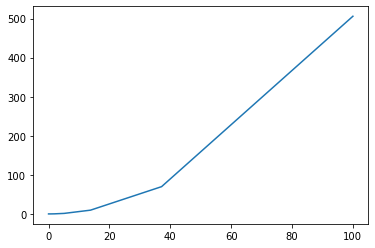

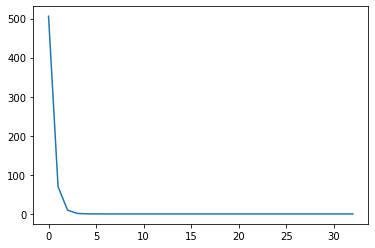

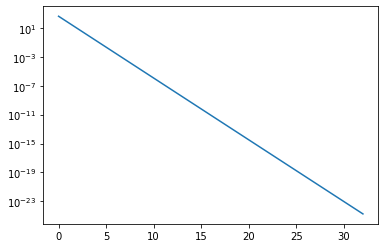

In [119]:
alpha = [.5, 1/20, 1/200]
X = [
    [10,10],
    [10]*10
]

for a in alpha:
    for x_i in X:
        print('alpha: ', a, 'x_i: ', x_i)

        _, xs, ys = algo2(np.array(x_i), f_2, f_2_prime , a)

        print("first 5 xs :")
        print(xs[:5])
        print("first 5 yss :")
        print(ys[:5])

        print("last 5 xs :")
        print(xs[-5:])
        print("last 5 ys :")
        print(ys[-5:])

        plt.plot(np.sum(xs, axis=1),ys)
        plt.show()

        plt.plot(np.arange(len(ys)),ys)
        plt.show()

        plt.semilogy(np.arange(len(ys)),ys)
        plt.show()


In [120]:
def f_3_prime(X, alpha):
    n = len(X)
    s = []
    i = 0
    for x in X:
        i += 1
        s += [(10**(alpha*(i-1)/(n-1))*2*(x-1) + 10*2*np.pi*np.sin(2*np.pi*(x-1)))]
    return s

alpha:  0.5 x_i:  [10, 10]
0 [17.99999999999986, 56.920997883030694]
1000 [-8.365454443678951e-11, -1.2576073515901953e-09]
2000 [-8.365454443678951e-11, -1.2576073515901953e-09]
3000 [-8.365454443678951e-11, -1.2576073515901953e-09]
4000 [-8.365454443678951e-11, -1.2576073515901953e-09]
5000 [-8.365454443678951e-11, -1.2576073515901953e-09]
6000 [-8.365454443678951e-11, -1.2576073515901953e-09]
7000 [-8.365454443678951e-11, -1.2576073515901953e-09]
8000 [-8.365454443678951e-11, -1.2576073515901953e-09]
9000 [-8.365454443678951e-11, -1.2576073515901953e-09]
first 5 xs :
[[10.         10.        ]
 [ 7.1875      1.10609408]
 [ 7.01556625  1.00960614]
 [ 6.97121408  1.00020476]
 [ 0.5706052   0.17888688]]
first 5 yss :
[[337.14449047]
 [ 46.63468577]
 [ 36.25333017]
 [ 35.81852544]
 [ 27.02751501]]
last 5 xs :
[[1.         0.01579318]
 [1.         0.01579318]
 [1.         0.01579318]
 [1.         0.01579318]
 [1.         0.01579318]]
last 5 ys :
[[3.11237561]
 [3.11237561]
 [3.11237561]


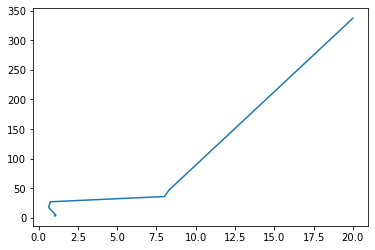

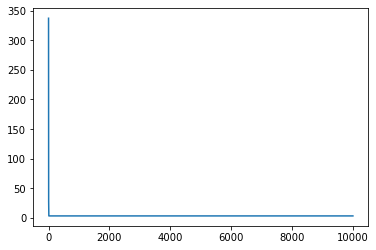

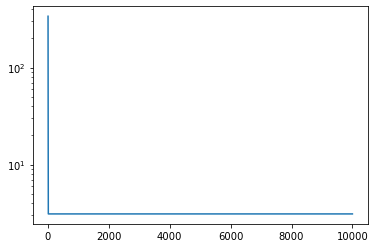

alpha:  0.5 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
0 [17.99999999999986, 20.456345994942907, 23.24789397026777, 26.420386817197112, 30.02580966960092, 34.12324174331463, 38.779824420573775, 44.07186144279996, 50.086069239728104, 56.920997883030694]
1000 [5.07968778151735e-10, -3.871608811323313e-09, 2.0381586196549506e-08, -1.08391162711996e-09, 5.383093082400592e-09, -2.264932685847043e-07, -1.616129452486348e-11, 7.345235530920036e-12, 8.135714324453147e-13, 0.0]
2000 [5.07968778151735e-10, -3.871608811323313e-09, 2.0381586196549506e-08, -1.08391162711996e-09, 5.383093082400592e-09, -2.264932685847043e-07, -1.616129452486348e-11, 7.345235530920036e-12, 8.135714324453147e-13, 0.0]
3000 [5.07968778151735e-10, -3.871608811323313e-09, 2.0381586196549506e-08, -1.08391162711996e-09, 5.383093082400592e-09, -2.264932685847043e-07, -1.616129452486348e-11, 7.345235530920036e-12, 8.135714324453147e-13, 0.0]
4000 [5.07968778151735e-10, -3.871608811323313e-09, 2.0381586196549506e-08, -1.0

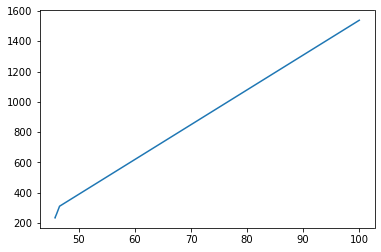

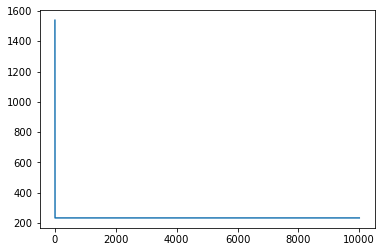

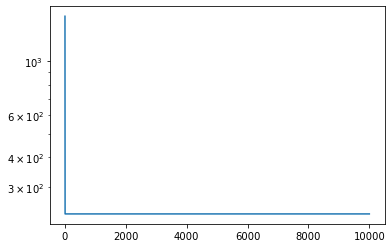

alpha:  0.05 x_i:  [10, 10]
0 [17.99999999999986, 20.196332177435202]
1000 [1.172844097396819e-07, -2.139697663494644e-08]
2000 [1.172844097396819e-07, -2.139697663494644e-08]
3000 [1.172844097396819e-07, -2.139697663494644e-08]
4000 [1.172844097396819e-07, -2.139697663494644e-08]
5000 [1.172844097396819e-07, -2.139697663494644e-08]
6000 [1.172844097396819e-07, -2.139697663494644e-08]
7000 [1.172844097396819e-07, -2.139697663494644e-08]
8000 [1.172844097396819e-07, -2.139697663494644e-08]
9000 [1.172844097396819e-07, -2.139697663494644e-08]
first 5 xs :
[[10.         10.        ]
 [ 4.375       3.68864619]
 [ 4.12510337  3.94346699]
 [ 4.00130483  3.98069042]
 [ 3.9853924   3.98292589]]
first 5 yss :
[[171.8834948 ]
 [ 50.33276055]
 [ 23.04521916]
 [ 19.05026632]
 [ 18.99569613]]
last 5 xs :
[[3.9848557  3.98301169]
 [3.9848557  3.98301169]
 [3.9848557  3.98301169]
 [3.9848557  3.98301169]
 [3.9848557  3.98301169]]
last 5 ys :
[[18.99563778]
 [18.99563778]
 [18.99563778]
 [18.99563778]

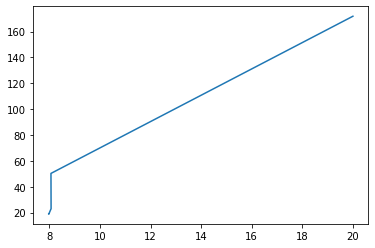

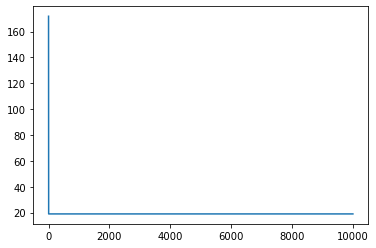

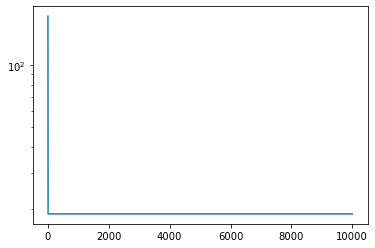

alpha:  0.05 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
0 [17.99999999999986, 18.231737558781337, 18.46645857846004, 18.704201469032906, 18.945005134999054, 19.188908981726122, 19.435952921898636, 19.686177382049333, 19.939623309174625, 20.196332177435202]
1000 [-3.8200029006674185e-07, 4.752030768884197e-09, 3.020726691005393e-07, 5.434499570355911e-07, 2.48386406553891e-07, 2.1493558932661472e-08, -4.6535686415438704e-08, -1.2076420663476028e-07, -6.482063064083832e-08, 6.598505475352567e-08]
2000 [-3.8182496364669305e-07, 4.752030768884197e-09, 3.020726691005393e-07, 5.432744361044684e-07, 2.48386406553891e-07, 2.1493558932661472e-08, -4.6535686415438704e-08, -1.2076420663476028e-07, -6.482063064083832e-08, 6.598505475352567e-08]
3000 [-3.816494151820393e-07, 4.752030768884197e-09, 3.020726691005393e-07, 5.430991389943074e-07, 2.48386406553891e-07, 2.1493558932661472e-08, -4.6535686415438704e-08, -1.2076420663476028e-07, -6.482063064083832e-08, 6.598505475352567e-08]
4000 [-3.81

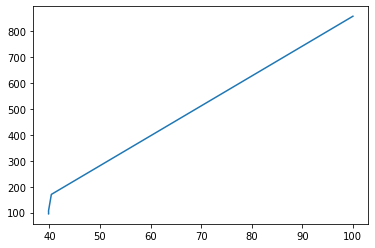

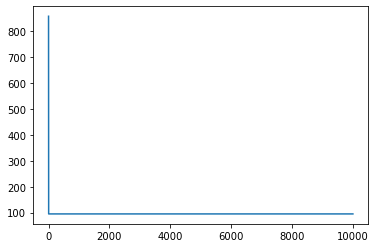

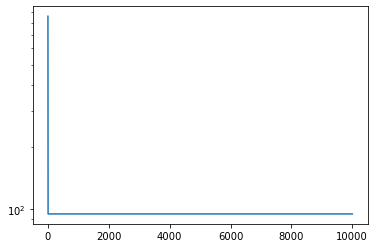

alpha:  0.005 x_i:  [10, 10]
0 [17.99999999999986, 18.208430176678036]
1000 [-4.99992839797514e-07, -9.587175311409624e-07]
2000 [-4.99992839797514e-07, -9.587175311409624e-07]
3000 [-4.99992839797514e-07, -9.587175311409624e-07]
4000 [-4.99992839797514e-07, -9.587175311409624e-07]
5000 [-4.99992839797514e-07, -9.587175311409624e-07]
6000 [-4.99992839797514e-07, -9.587175311409624e-07]
7000 [-4.99992839797514e-07, -9.587175311409624e-07]
8000 [-4.99992839797514e-07, -9.587175311409624e-07]
9000 [-4.99992839797514e-07, -9.587175311409624e-07]
first 5 xs :
[[10.         10.        ]
 [ 4.375       4.30986557]
 [ 4.12510337  3.99182124]
 [ 4.00130483  3.98492303]
 [ 1.96451437  3.9550093 ]]
first 5 yss :
[[162.9379358 ]
 [ 53.21714911]
 [ 21.76764049]
 [ 18.0659391 ]
 [ 10.40791477]]
last 5 xs :
[[1.99495864 3.9846807 ]
 [1.99495864 3.9846807 ]
 [1.99495864 3.9846807 ]
 [1.99495864 3.9846807 ]
 [1.99495864 3.9846807 ]]
last 5 ys :
[[10.05271982]
 [10.05271982]
 [10.05271982]
 [10.05271982

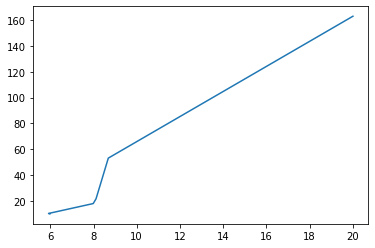

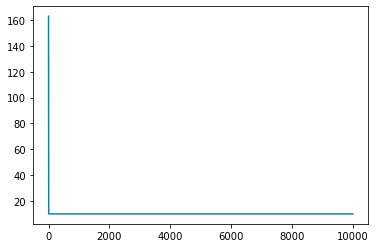

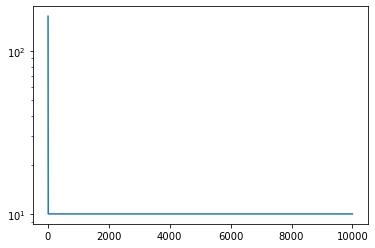

alpha:  0.005 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
0 [17.99999999999986, 18.023040584706436, 18.046110662109875, 18.069210269961793, 18.092339446062123, 18.11549822825918, 18.13868665444974, 18.161904762579063, 18.185152590641, 18.208430176678036]
1000 [7.016473366761034e-07, 5.106024900669581e-07, 3.6408405890142603e-07, 2.539549210922587e-07, 1.7372012628413813e-07, 1.1715514069976507e-07, 7.812719537980684e-08, 5.082801468603293e-08, 3.0050342658682894e-08, 1.1384252651680526e-08]
2000 [7.016473366761034e-07, 5.106024900669581e-07, 3.6408405890142603e-07, 2.539549210922587e-07, 1.7372012628413813e-07, 1.1715514069976507e-07, 7.812719537980684e-08, 5.082801468603293e-08, 3.0050342658682894e-08, 1.1384252651680526e-08]
3000 [7.016473366761034e-07, 5.106024900669581e-07, 3.6408405890142603e-07, 2.539549210922587e-07, 1.7372012628413813e-07, 1.1715514069976507e-07, 7.812719537980684e-08, 5.082801468603293e-08, 3.0050342658682894e-08, 1.1384252651680526e-08]
4000 [7.01647336676

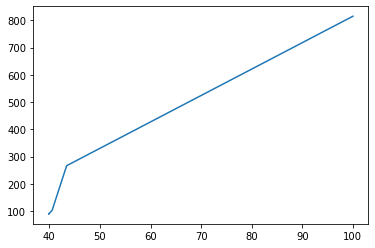

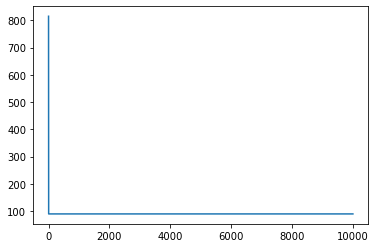

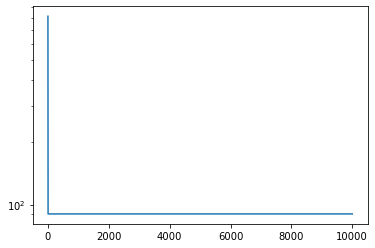

In [121]:
alpha = [.5, 1/20, 1/200]
X = [
    [10,10],
    [10]*10
]

for a in alpha:
    for x_i in X:
        print('alpha: ', a, 'x_i: ', x_i)

        _, xs, ys = algo2(np.array(x_i), f_3, f_3_prime , a)

        print("first 5 xs :")
        print(xs[:5])
        print("first 5 yss :")
        print(ys[:5])

        print("last 5 xs :")
        print(xs[-5:])
        print("last 5 ys :")
        print(ys[-5:])

        plt.plot(np.sum(xs, axis=1),ys)
        plt.show()

        plt.plot(np.arange(len(ys)),ys)
        plt.show()

        plt.semilogy(np.arange(len(ys)),ys)
        plt.show()

In [110]:
def f_4_prime(X, alpha):
    n = len(X)
    s = []
    
    # 1
    g = 4*10**alpha * (X[0]-1)*((X[0] - 1)**2 - (X[1] - 1)) + 2*(X[0] - 2)
    s += [g]
    
    # 2 ... n-1
    for i in range(1,n-1):
        g = 4*10**alpha * (X[i]-1)*((X[i] - 1)**2 - (X[i+1] - 1)) + 2*(X[i] - 2)
        g += -2*10**alpha*((X[i]-1)**2 - (X[i+1] - 1))
        s += [g]
    
    # n
    g = -2*10**alpha*((X[n-2]-1)**2 - (X[n-1] - 1))
    s += [g]
    
    return s

alpha:  0.5 x_i:  [10, 10]
i:  1147 , d: [1.14631234e-13 8.73495367e-13]  break !
first 5 xs :
[array([ 7.49370615, 10.13896728]), array([ 5.83111018, 10.26646687]), array([ 4.77195203, 10.37511735]), array([ 4.19317804, 10.45004395]), array([ 4.108872  , 10.46156807])]
first 5 yss :
[3480.009132336007, 640.9785012107586, 82.14524637703732, 6.571502058598161, 4.57832002986634]
last 5 xs :
[array([2., 2.]), array([2., 2.]), array([2., 2.]), array([2., 2.]), array([2., 2.])]
last 5 ys :
[1.0685602754465755e-24, 1.0178679928753549e-24, 9.66226969111523e-25, 9.267290720177781e-25, 8.380560523548587e-25]


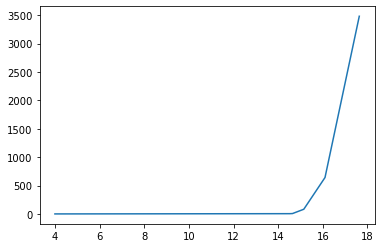

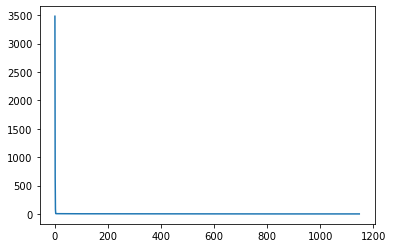

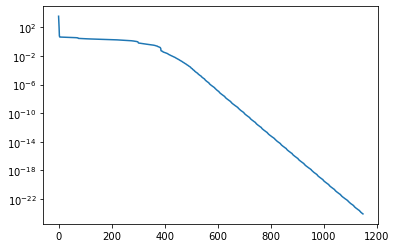

alpha:  0.5 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
i:  466 , d: [3.74164291e-13 2.60652873e-13 2.63005756e-13 2.36574703e-13
 1.76034439e-13 2.06349452e-13 9.94134062e-14 2.36777616e-13
 1.65560233e-13 6.85314693e-13]  break !
first 5 xs :
[array([ 7.49370615,  7.63267343,  7.63267343,  7.63267343,  7.63267343,
        7.63267343,  7.63267343,  7.63267343,  7.63267343, 10.13896728]), array([ 5.70545955,  5.85693917,  5.85693917,  5.85693917,  5.85693917,
        5.85693917,  5.85693917,  5.85693917,  5.97560396, 10.27350841]), array([ 4.44059514,  4.58727197,  4.58727197,  4.58727197,  4.58727197,
        4.58727197,  4.58727197,  4.5952551 ,  4.89590633, 10.39304441]), array([ 3.55206129,  3.68976504,  3.68976504,  3.68976504,  3.68976504,
        3.68976504,  3.69052615,  3.7194415 ,  4.27508258, 10.48237013]), array([ 2.93426987,  3.05855634,  3.05855634,  3.05855634,  3.05855634,
        3.05865928,  3.06255738,  3.13784263,  4.03968077, 10.52078056])]
first 5 yss :
[39014.

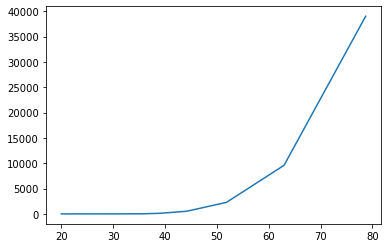

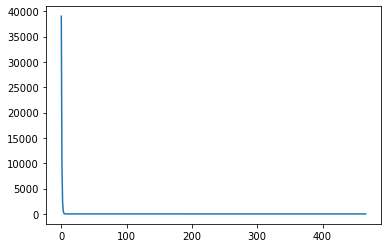

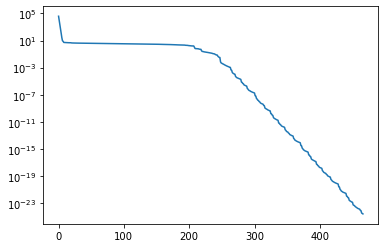

alpha:  0.05 x_i:  [10, 10]
i:  166 , d: [3.28849156e-13 6.68686780e-13]  break !
first 5 xs :
[array([ 6.43033223, 10.19722981]), array([ 5.20134234, 10.30839772]), array([ 4.40195035, 10.39981242]), array([ 4.21645896, 10.42362741]), array([ 4.04319371, 10.44383209])]
first 5 yss :
[481.6032091954226, 88.3451637575622, 11.06966999025784, 5.866460604087861, 4.212135423345244]
last 5 xs :
[array([2., 2.]), array([2., 2.]), array([2., 2.]), array([2., 2.]), array([2., 2.])]
last 5 ys :
[1.301144974829293e-22, 5.095710115958473e-23, 3.1434714076589548e-24, 7.937034680847357e-25, 8.232141530523025e-26]


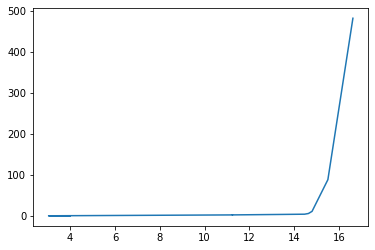

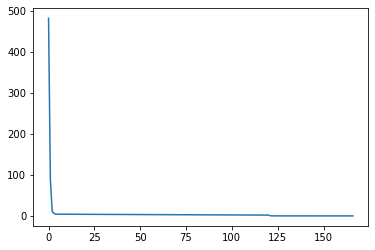

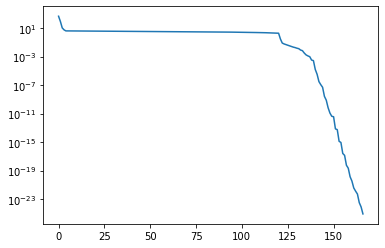

alpha:  0.05 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
i:  275 , d: [1.53987334e-13 1.10492674e-15 5.63055946e-16 2.79409457e-15
 7.81922777e-15 1.96670362e-14 4.90804014e-14 1.29025402e-13
 3.41569705e-13 9.01880083e-13]  break !
first 5 xs :
[array([ 6.43033223,  6.62756204,  6.62756204,  6.62756204,  6.62756204,
        6.62756204,  6.62756204,  6.62756204,  6.62756204, 10.19722981]), array([ 4.98894247,  5.14183452,  5.14183452,  5.14183452,  5.14183452,
        5.14183452,  5.14183452,  5.14183452,  5.34239196, 10.32034627]), array([ 3.93088972,  4.0726052 ,  4.0726052 ,  4.0726052 ,  4.0726052 ,
        4.0726052 ,  4.0726052 ,  4.08861143,  4.50678213, 10.42483447]), array([ 3.1844115 ,  3.31407159,  3.31407159,  3.31407159,  3.31407159,
        3.31407159,  3.31587637,  3.36336876,  4.07924803, 10.48778774]), array([ 2.66756647,  2.77919191,  2.77919191,  2.77919191,  2.77919191,
        2.7794789 ,  2.78696195,  2.90074253,  3.99938831, 10.48752392])]
first 5 yss :
[6722.

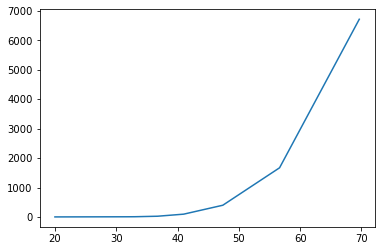

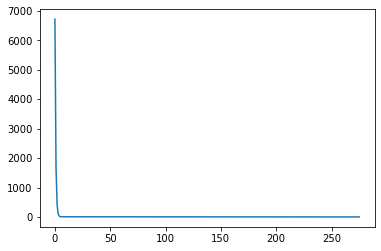

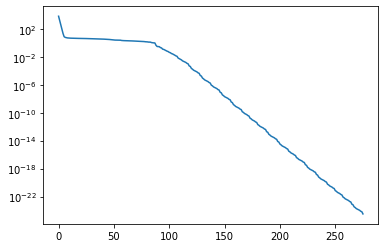

alpha:  0.005 x_i:  [10, 10]
i:  223 , d: [4.63403869e-13 8.82739938e-13]  break !
first 5 xs :
[array([ 6.77976813, 10.1778167 ]), array([ 5.37309786, 10.29748686]), array([ 4.49113728, 10.39455994]), array([ 4.05711708, 10.44975187]), array([ 4.02947664, 10.44770131])]
first 5 yss :
[616.6345044515562, 109.05596584831403, 14.099653795213241, 4.242627171074506, 4.1925046005921995]
last 5 xs :
[array([2., 2.]), array([2., 2.]), array([2., 2.]), array([2., 2.]), array([2., 2.])]
last 5 ys :
[3.126641137181244e-24, 1.9080848914031788e-24, 1.5662357511934124e-24, 1.4345581933734413e-24, 5.308371309410353e-25]


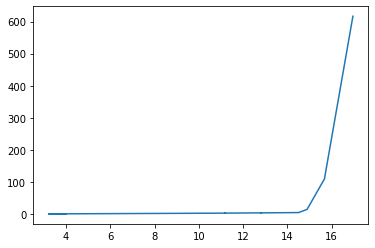

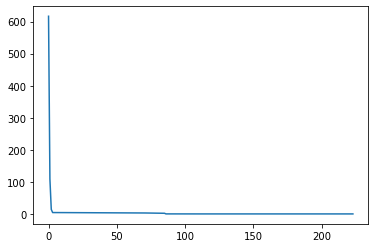

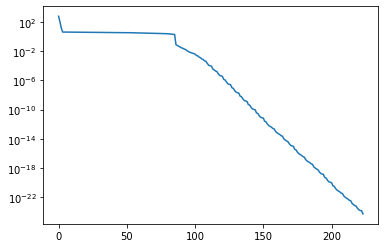

alpha:  0.005 x_i:  [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
i:  191 , d: [2.94925840e-13 3.57328292e-15 9.19032284e-16 1.27570221e-15
 6.08869117e-15 1.07011300e-14 3.49273369e-14 9.08231293e-14
 2.51542071e-13 6.81933448e-13]  break !
first 5 xs :
[array([ 6.77976813,  6.95758483,  6.95758483,  6.95758483,  6.95758483,
        6.95758483,  6.95758483,  6.95758483,  6.95758483, 10.1778167 ]), array([ 5.18923348,  5.34101909,  5.34101909,  5.34101909,  5.34101909,
        5.34101909,  5.34101909,  5.34101909,  5.51463427, 10.30779577]), array([ 4.06482902,  4.20774722,  4.20774722,  4.20774722,  4.20774722,
        4.20774722,  4.20774722,  4.22092263,  4.60192544, 10.41719381]), array([ 3.2754066 ,  3.40689165,  3.40689165,  3.40689165,  3.40689165,
        3.40689165,  3.40830137,  3.44939679,  4.11515794, 10.48746446]), array([ 2.72736702,  2.84162593,  2.84162593,  2.84162593,  2.84162593,
        2.84183838,  2.8479899 ,  2.94841072,  3.98773891, 10.49602908])]
first 5 yss :
[7859

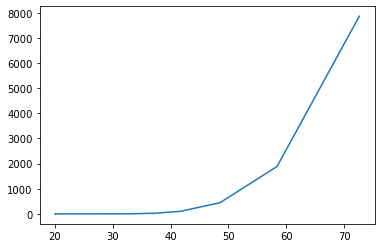

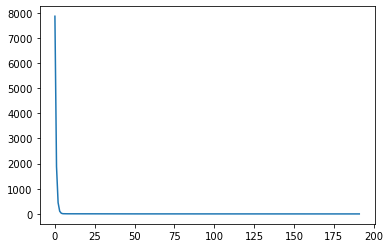

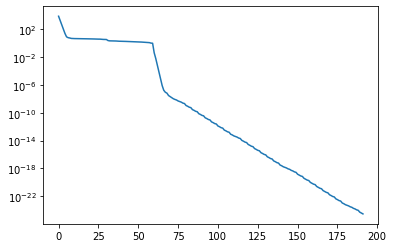

In [114]:
alpha = [.5, 1/20, 1/200]
X = [
    [10,10],
    [10]*10
]

for a in alpha:
    for x_i in X:
        print('alpha: ', a, 'x_i: ', x_i)

        xs, ys = gd_adaptatif_sz(np.array(x_i), f_4, f_4_prime , a)

        print("first 5 xs :")
        print(xs[:5])
        print("first 5 yss :")
        print(ys[:5])

        print("last 5 xs :")
        print(xs[-5:])
        print("last 5 ys :")
        print(ys[-5:])

        plt.plot(np.sum(xs, axis=1),ys)
        plt.show()

        plt.plot(np.arange(len(ys)),ys)
        plt.show()

        plt.semilogy(np.arange(len(ys)),ys)
        plt.show()

# 3. Newton

In [ ]:
def f_1_second(X, alpha):
    return 2 * alpha * np.ones(len(X))

def f_2_second(X, alpha):
    s = []
    for i in range(1, n+1):
        s += [(10**(alpha*(i-1)/(n-1)))]
    return s
            
def f_3_second(X, alpha):
    n = len(X)
    s = []
    i = 0
    for x in X:
        i += 1
        s += [(10**(alpha*(i-1)/(n-1))*2 + 10*4*(np.pi**2)*np.cos(2*np.pi*(x-1)))]
    return s

def f_4_second(X, alpha):
    